# **Projeto Python (Análise de Crédito - EBAC)**

Este notebook apresenta a análise de crédito de clientes de uma base fictícia, desenvolvida pelo professor André Perez da EBAC. A concessão de crédito é um processo complexo que envolve múltiplas variáveis, tornando crucial a definição de uma estratégia eficiente para segmentar clientes, evitando tanto a perda de potenciais bons pagadores quanto o aumento da inadimplência. Neste notebook, são realizadas etapas de processamento de dados, incluindo limpeza, engenharia de atributos e visualização das variáveis da base.

# **Índice**
* Bibliotecas
* Carregamento da Base de Dados e primeiras mudanças
    * Carregamento da Base e Exploração dos dados
    * Estrutura da base
    * Schema  
* Correção de problemas
* Visualização
    * Visualizações categóricas
    * Visualizações numéricas
* Conclusão  

# **Bibliotecas**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import seaborn as sns
import pandas as pd 

# **Carregamento da Base de Dados e primeiras mudanças**

# Carregamento da Base e Exploração dos dados

In [2]:
df = pd.read_csv('/kaggle/input/dados-credito/credito.csv', na_values=['na', 'Na', 'NA', 'nan', 'NaN', 'NAN', '', None])

In [3]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Agora vou utilizar o trecho de código abaixo para obter um resultado booleano. Este resultado me ajudará a perceber se há algum dado faltante na base de dados (True = dados faltantes; False = Sem dados faltantes).

In [4]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Após a análise podemos concluir que há ausência de dados nas tabelas escolaridade, estado_civil e salario_anual.


# Estrutura da base

In [5]:
df.shape # retorna uma tupla com os respectivos valores: quantidade de linhas, quantidade de colunas.

(10127, 16)

In [6]:
df[df['default'] == 0].shape # retorna a quantidade de clientes adimplentes

(8500, 16)

In [7]:
df[df['default'] == 1].shape # retorna a quantidade de clientes inadimplentes

(1627, 16)

Com as linhas de código acima conseguimos obter o número de clientes adimplentes e inadimplentes. Com esses dados é possível fazer uma proporção para obter a porcentagem destes dados, para termos uma ideia se a porcentagem atual corresponde ao nível esperado de pessoas adimplentes e inadimplentes.

In [8]:
valor_total, _ = df.shape
adimplentes, _ = df[df['default'] == 0].shape
inadimplentes, _ = df[df['default'] == 1].shape

In [9]:
print(f"A proporção clientes adimplentes é de {round(100 * adimplentes / valor_total, 2)}%")
print(f"A proporção clientes inadimplentes é de {round(100 * inadimplentes / valor_total, 2)}%")

A proporção clientes adimplentes é de 83.93%
A proporção clientes inadimplentes é de 16.07%


# Schema

In [10]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Após o carregamento da base, conseguimos ver através dos códigos acima que algumas colunas utilizam os tipos de dados errados, como a coluna "limite_credito" e a coluna "valor_transacoes_12m". Ao acabarmos a exploração dos dados, realizaremos o tratamento desses dados para que passem a ter o tipo certo.

In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Acima conseguimos ter uma visão mais detalhada dos atributos categóricos presentes na base de dados inserida.

In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Também temos acima uma visão mais detalhada acerca dos atributos numéricos presentes na bese de dados.

# **Correção de problemas**

Aproveitando que conseguimos detectar os dados faltantes presentes em algumas tabelas na base de dados, a linha de código abaixo executará a tarefa de 'dropar' ou simplesmente eliminar os dados faltantes sem termos muitos problema. Pois como definimos no carregamento da base de dados quais seriam as nomenclaturas que poderiam aparecer para os tipos de dados faltantes, o pandas ja sabe como agir caso tenha a necessidade de remoção desses dados.

In [13]:
df.dropna(inplace=True)

In [14]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

Para fazer a correção dos tipos de dados basta usar os códigos acima, fazendo com que a função lambda execute o replace em um ponto, trocando para vazio e também o replace em uma vírgulan trocando por um ponto. Nesse caso, se um número estivesse escrito utilizando os padrões brasileiros ele seria representado da seguinte forma: 2.030,99. Porém o python não reconhece esse tipo de dado como sendo um dado numérico, pois a sua percepção de dados numéricos tem que estar alinhada com os padrões americanos, no caso o número deverá ficar assim após a função: 2030.99.

# **Visualização**


Após a o carregamento dos dados, a análise e a correção agora vamos finalmente avaliar algumas visualizações a partir dos dados que temos em mãos.

In [15]:
sns.set_style("whitegrid")
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

# Visualizções Categóricas

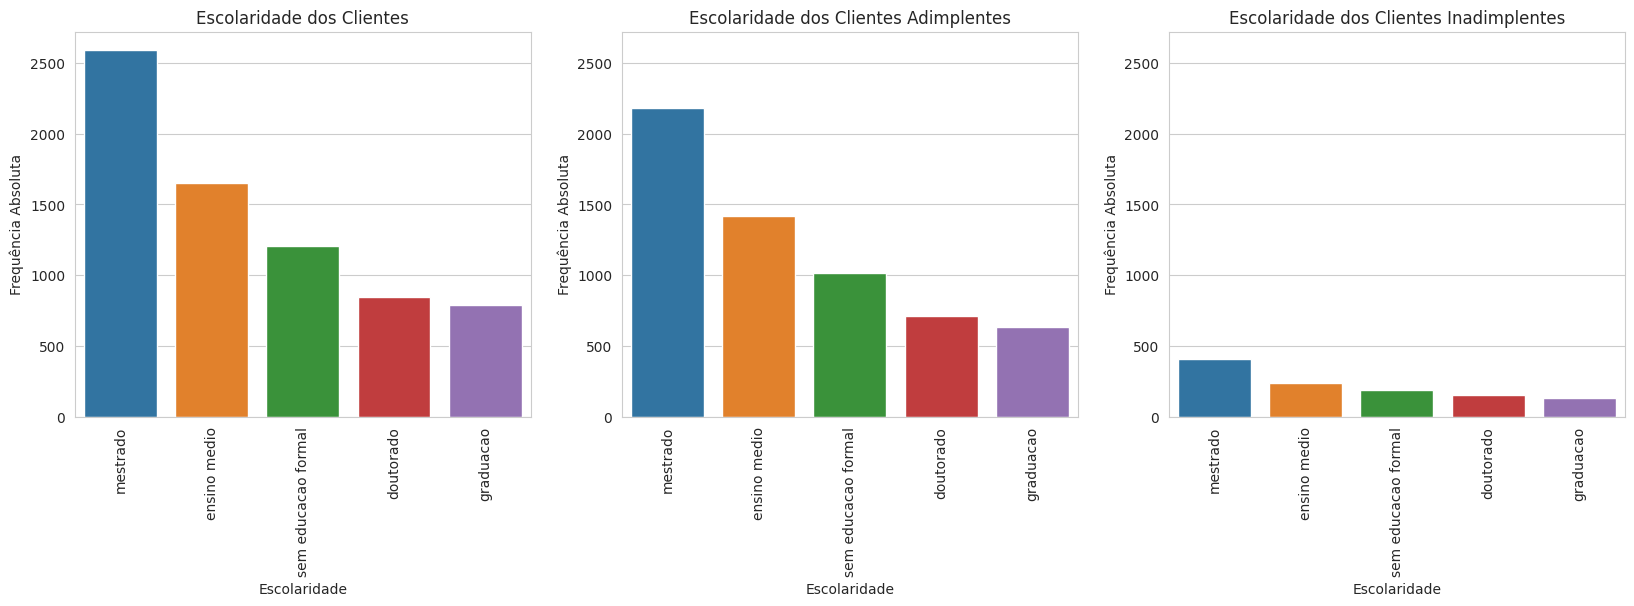

In [16]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={'count': 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    try:
        df_to_plot.sort_values(by=[coluna], inplace=True)
    except:
        df_to_plot.drop_duplicates(subset =[coluna], inplace=True)

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.xaxis.set_major_locator(FixedLocator(range(len(df_to_plot[coluna]))))
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

Acima temos gráficos que mostram o nível de escolaridade dos clientes presentes na base de dados, podemos observar que o nível de escolaridade não tem uma influência muito significativa com a porcentagem de clientes inadimplentes sendo que sua maioria possue mestrado, seguido por ensino médio.

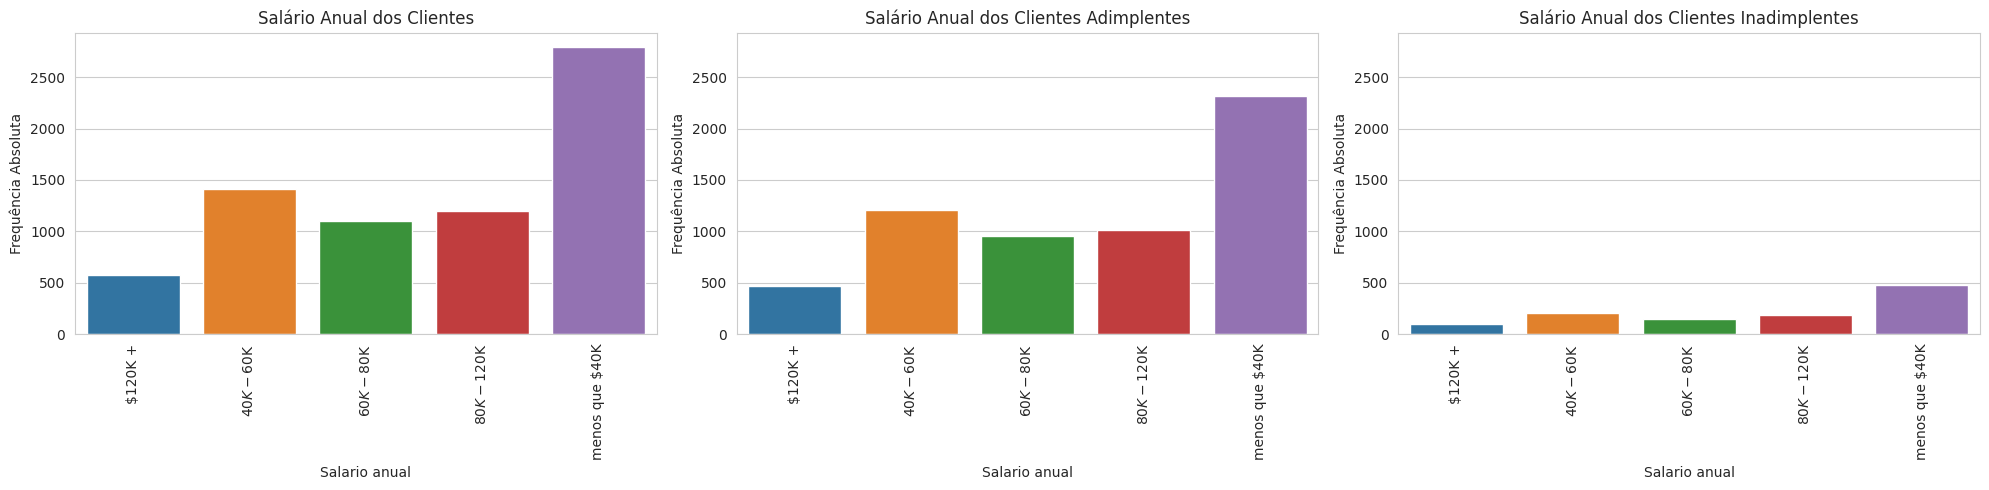

In [17]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    # Contagem de valores e transformação para DataFrame
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)

    # Criação do gráfico de barras
    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.replace('_', ' ').capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    
    # Atualização do valor máximo de y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    eixo += 1

# Ajuste do limite y de todos os subplots para ser o mesmo
for ax in eixos:
    ax.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

Utilizando agora os dados de salário anual, ja podemos perceber que também não há uma grande variação nos dados obtidos, fazendo com que cheguemos a conclusão de que a inadimplência do usuário não está relacionada a uma categoria específica de alguma das variáveis categóricas da base.

# Visualizações numéricas

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


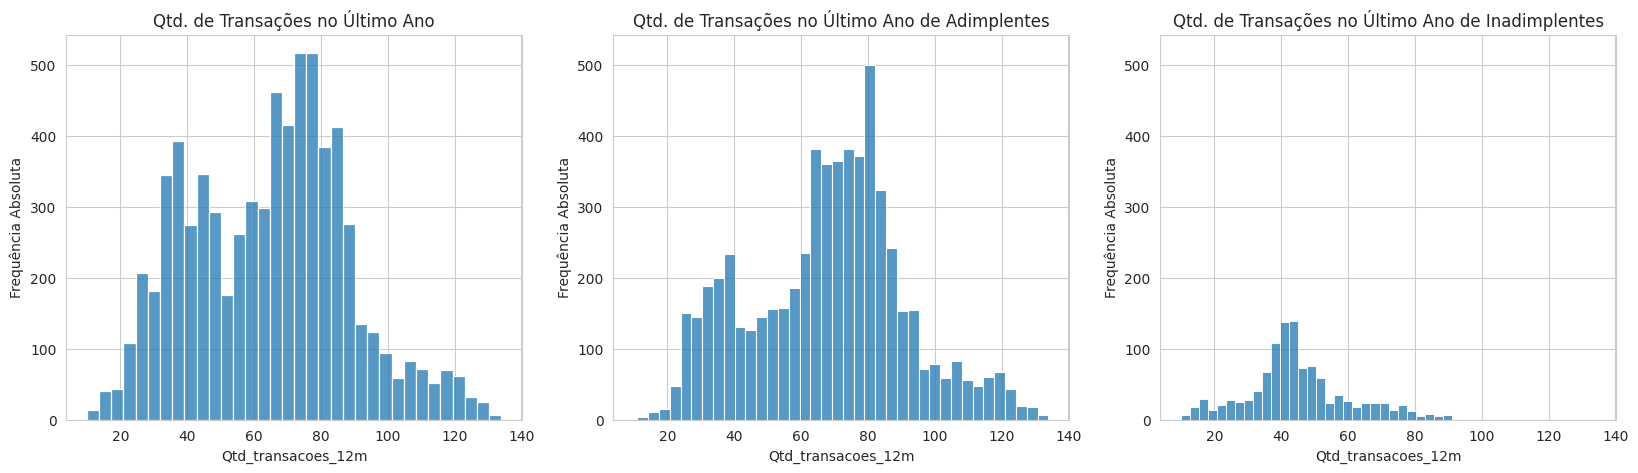

In [18]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


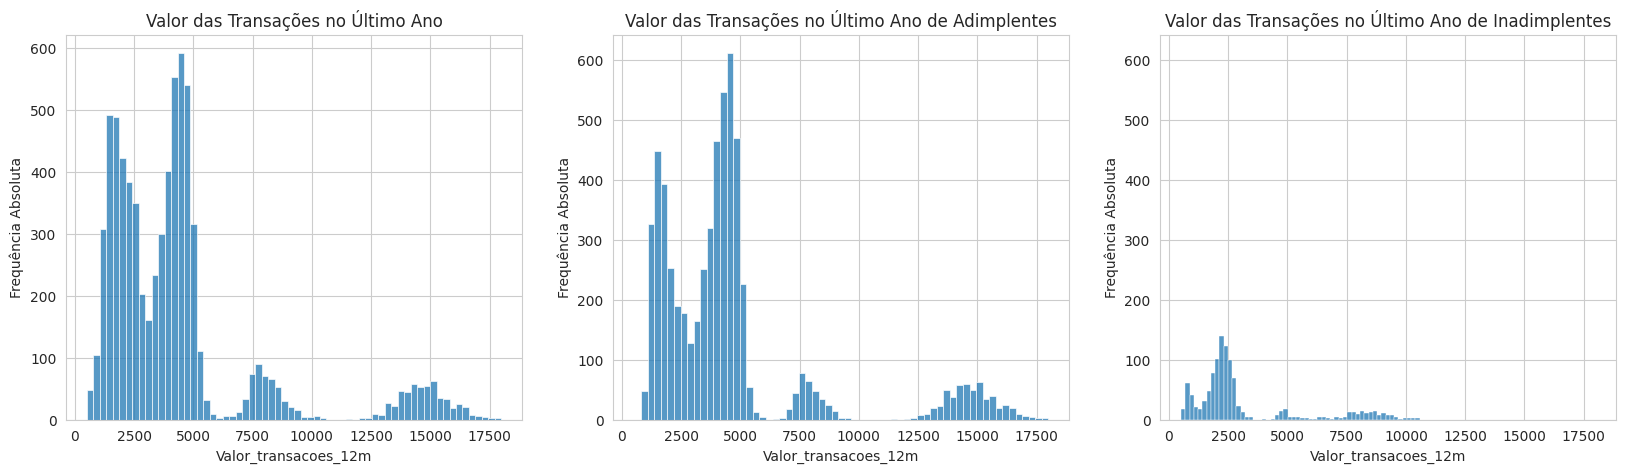

In [19]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

Após a avaliação de alguns dados numéricos concluímos que a as maiores diferenças entre clientes adimplentes e inadimplentes está ligada a quantidade de transações realizadas no último ano e também ao valor dessas transações.

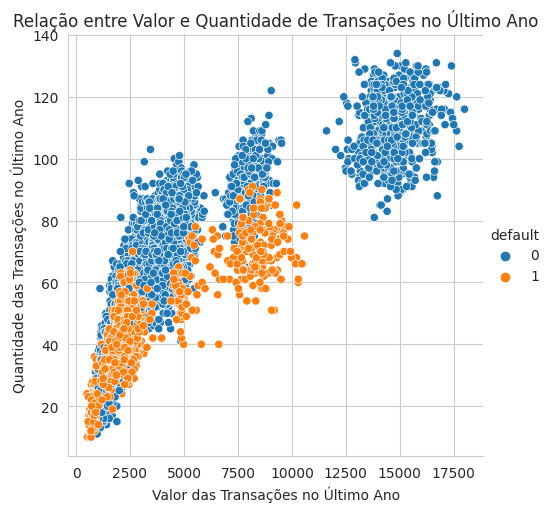

In [20]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

Ao inspecionarmos todas essas relações numéricas podemos retirar bons insights, como por exemplo podemos perceber que quando um cliente tende a usar mais as funcionalidades do cartão o mesmo tende a gastar mais. Para além disso também conseguimos perceber uma clara diferença no perfil de gastos entre clientes adimplentes e inadimplentes.

# **Conclusão**

A análise dos dados de crédito revela que muitas das características de perfil são semelhantes entre clientes adimplentes e inadimplentes, tornando difícil distingui-los com base em uma única característica. No entanto, diferenças significativas emergem ao analisar o comportamento de uso do cartão de crédito: de maneira geral, os clientes inadimplentes tendem a utilizar o cartão com menor frequência, gastam menos em transações, contratam menos produtos financeiros e interrompem o uso do cartão por períodos mais longos. Portanto, um modelo eficaz para diferenciar os tipos de clientes, visando identificar possíveis candidatos ao aumento de crédito, deve focar nas características de uso do cartão. Clientes ativos, que utilizam o cartão de forma regular e realizam transações de maior valor, devem ser considerados mais aptos para a concessão de crédito.